/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_58750/132964073.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavFileReader(file_path)


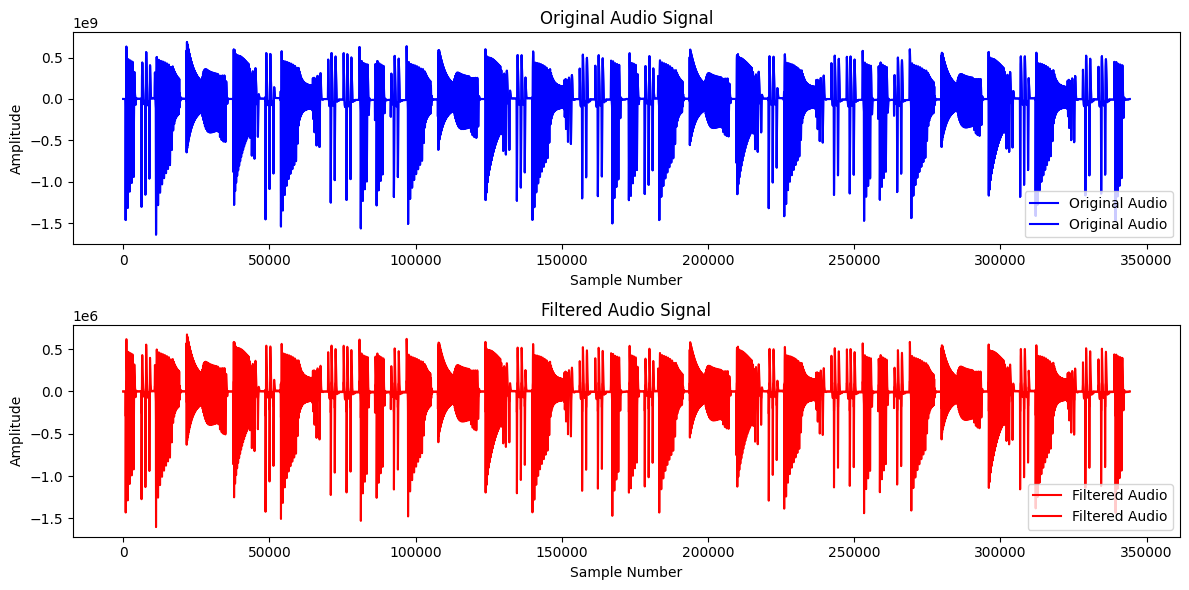

Filtered audio saved to Output/EQ_music_by_filter.wav


In [63]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavFileReader, write as wavFileWriter
from scipy.signal import iirfilter, sosfreqz, sosfilt

# Load the audio file
file_path = "Data/CTHS3_Acid_Bass_Loop_01_C_123.wav"
sample_rate, audio_data = wavFileReader(file_path)

# Design a parametric equalizer
def design_parametric_eq(fs, center_freq, bandwidth, gain):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')
    return sos

def apply_parametric_eq(data, sos):
    return sosfilt(sos, data)

# Parameters for the parametric equalizer
center_freq = 1000.0  # Center frequency in Hz
bandwidth = 200.0  # Bandwidth in Hz
gain = 3.0  # Gain in dB

# Design and apply the parametric equalizer
sos = design_parametric_eq(sample_rate, center_freq, bandwidth, gain)
filtered_audio = apply_parametric_eq(audio_data, sos)

# Plot the two audio signals in one plot using different colors
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue', label='Original Audio')
plt.title('Original Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_audio, color='red', label='Filtered Audio')
plt.title('Filtered Audio Signal')  
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Save the filtered audio to a new WAV file
output_file_path = "Output/EQ_music_by_filter.wav"
wavFileWriter(output_file_path, sample_rate, filtered_audio.astype(np.int16))
print(f"Filtered audio saved to {output_file_path}")

/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_58750/68660280.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavFileReader(file_path)


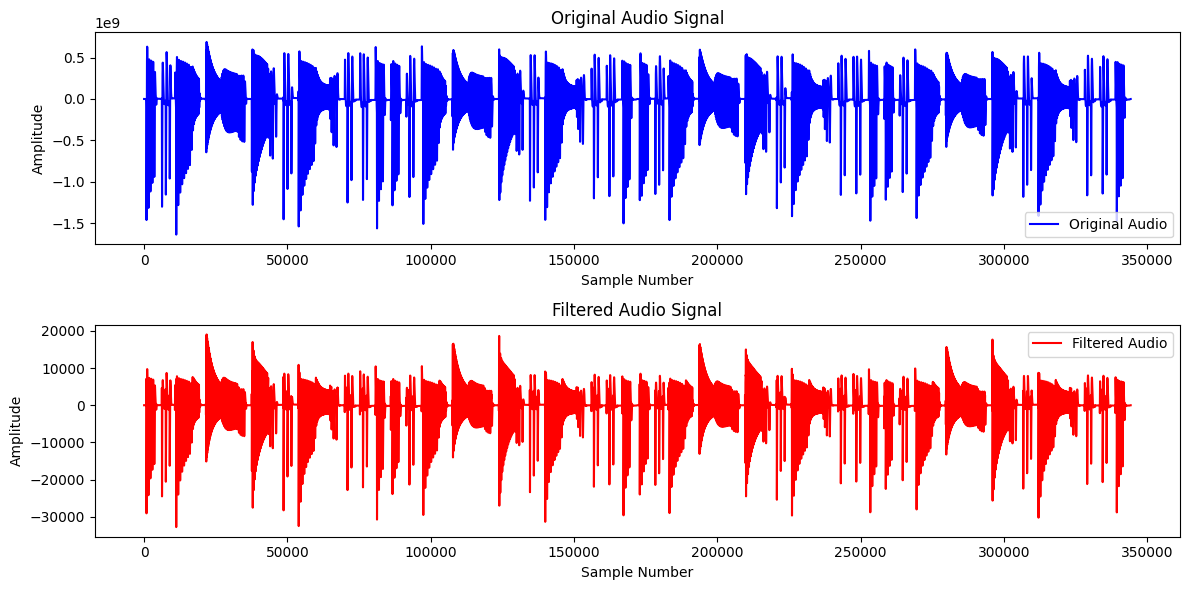

Filtered audio saved to Output/EQ_music_by_convolution.wav


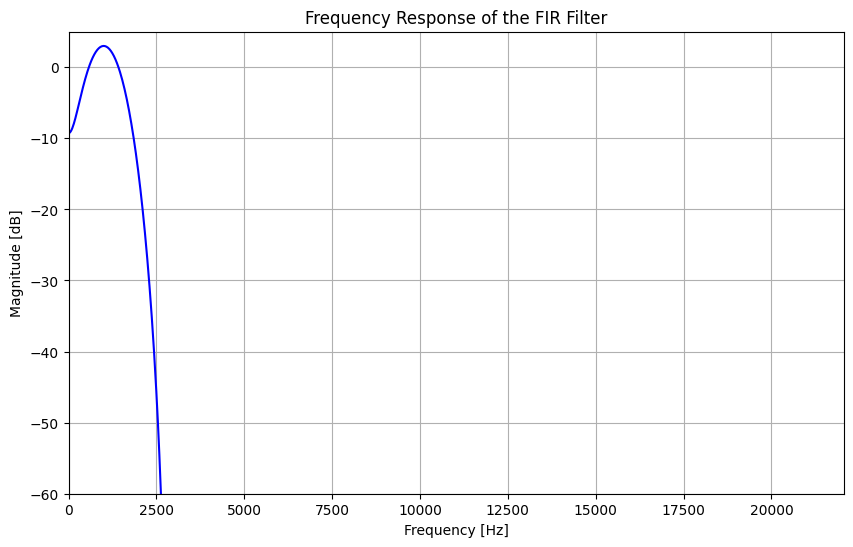

/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_58750/68660280.py:130: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), 'b')


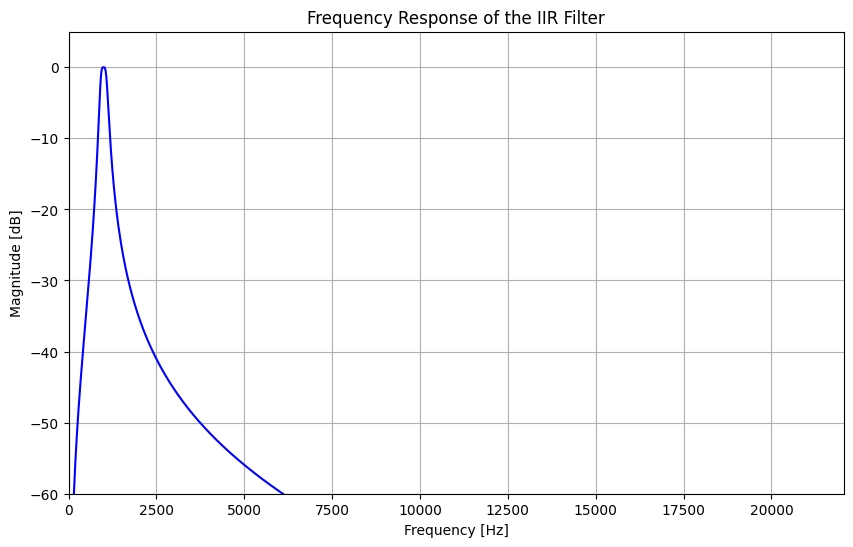

In [62]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavFileReader, write as wavFileWriter
from scipy.signal import firwin, convolve

# Load the audio file
# file_path = "Data/sine_wave_44100Hz_16bit_1min.wav"
file_path = "Data/CTHS3_Acid_Bass_Loop_01_C_123.wav"
sample_rate, audio_data = wavFileReader(file_path)

# Check channel count and convert to mono if necessary
if audio_data.ndim > 1: 
    if audio_data.shape[1] == 2:  # Stereo
        audio_data = np.mean(audio_data, axis=1)  # Convert to mono by averaging channels
    else:
        raise ValueError("Unsupported number of channels in audio data")
# Check if audio data is empty
if audio_data.size == 0:
    raise ValueError("Audio data is empty")
# Check if audio data is 1D or 2D
if audio_data.ndim != 1 and audio_data.ndim != 2:
    raise ValueError("Audio data must be 1D or 2D array")

# # Check bit depth and convert to float if necessary
# if audio_data.dtype == np.int16:
#     audio_data = audio_data.astype(np.float32) / 32768.0  # Convert to float in range [-1, 1]
# elif audio_data.dtype == np.int32:
#     audio_data = audio_data.astype(np.float32) / 2147483648.0
# elif audio_data.dtype == np.float32 or audio_data.dtype == np.float64:
#     audio_data = audio_data.astype(np.float32)
# elif audio_data.dtype == np.uint8:
#     audio_data = (audio_data.astype(np.float32) - 128) / 128.0
# else:
#     raise ValueError("Unsupported audio data type")
# # Normalize the audio data to the range of [-1, 1]
# audio_data = audio_data / np.max(np.abs(audio_data))  # Normalize to [-1, 1]

# Design an equalizer filter using FIR filter design
def design_fir_eq(fs, center_freq, bandwidth, gain_db, num_taps=101):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    # fir_coeffs = firwin(num_taps, [low, high], pass_zero=False)
    fir_coeffs = firwin(num_taps, [low, high], pass_zero=False, window='blackmanharris')
    gain = 10 ** (gain_db / 20)  # Convert gain from dB to linear scale
    return fir_coeffs * gain

# # Design a lowpass filter to remove high-frequency artifacts
# def design_lowpass_filter(fs, cutoff_freq, num_taps=501):
#     nyquist = 0.5 * fs
#     cutoff = cutoff_freq / nyquist
#     return firwin(num_taps, cutoff, pass_zero=True, window='hamming')

# Apply the FIR filter using convolution (handles multi-channel audio)
def apply_fir_eq(data, fir_coeffs):
    if data.ndim == 1:  # Mono audio
        return convolve(data, fir_coeffs, mode='same')
    elif data.ndim == 2:  # Stereo or multi-channel audio
        return np.array([convolve(channel, fir_coeffs, mode='same') for channel in data.T]).T
    else:
        raise ValueError("Unsupported audio data dimensions")

# Parameters for the equalizer
center_freq = 1000.0  # Center frequency in Hz
bandwidth = 200.0  # Bandwidth in Hz
gain_db = 3.0  # Gain in dB

# # Design and apply the FIR equalizer
fir_coeffs = design_fir_eq(sample_rate, center_freq, bandwidth, gain_db)
filtered_audio = apply_fir_eq(audio_data, fir_coeffs)

# # Apply a lowpass filter to remove high-frequency artifacts
# lowpass_cutoff = 20000.0  # Cutoff frequency in Hz
# lowpass_coeffs = design_lowpass_filter(sample_rate, lowpass_cutoff)
# filtered_audio = apply_fir_eq(filtered_audio, lowpass_coeffs)

# Normalize the filtered audio to the range of 16-bit PCM
def normalize_audio(audio):
    max_val = np.max(np.abs(audio))
    if max_val > 0:
        audio = audio / max_val  # Scale to [-1, 1]
    return (audio * 32767).astype(np.int16)  # Scale to 16-bit integer range

# Normalize the filtered audio
filtered_audio = normalize_audio(filtered_audio)

# Plot the two audio signals in one plot using different colors
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue', label='Original Audio')
plt.title('Original Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_audio, color='red', label='Filtered Audio')
plt.title('Filtered Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Save the filtered audio to a new WAV file
output_file_path = "Output/EQ_music_by_convolution.wav"
wavFileWriter(output_file_path, sample_rate, filtered_audio.astype(np.int16))
print(f"Filtered audio saved to {output_file_path}")

# Draw frequency response of the filter
def plot_frequency_response(fir_coeffs, fs):
    from scipy.signal import freqz  # Import freqz for FIR filters
    w, h = freqz(fir_coeffs, worN=1024, fs=fs)
    plt.figure(figsize=(10, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response of the FIR Filter')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid()
    plt.xlim(0, fs / 2)
    plt.ylim(-60, 5)
    plt.show()
# Plot the frequency response of the FIR filter
plot_frequency_response(fir_coeffs, sample_rate)

# Plot the frequency response of the IIR filter
def plot_iir_frequency_response(sos, fs):
    w, h = sosfreqz(sos, worN=1024, fs=fs)
    plt.figure(figsize=(10, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response of the IIR Filter')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid()
    plt.xlim(0, fs / 2)
    plt.ylim(-60, 5)
    plt.show()
# Plot the frequency response of the IIR filter
plot_iir_frequency_response(sos, sample_rate)